In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
df.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [5]:
print(df['country'].value_counts())
print(df['store'].value_counts())
print(df['product'].value_counts())

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64
store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64
product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64


In [6]:
df['date'] = pd.to_datetime(df['date'])

# Convert datetime to Unix timestamp (seconds since 1970)
df['date'] = df['date'].astype('int64') // 10**9  # Convert to seconds

In [7]:
cont_df = df.groupby(['country']).agg(
    total = ('num_sold','sum'),
    mode_product = ('product',lambda x: x.mode()[0] if not x.mode().empty else pd.NA)
)
cont_df.head()

,total,mode_product
country,,
Canada,28653095.0,Holographic Goose
Finland,28698872.0,Holographic Goose
Italy,20797669.0,Holographic Goose
Kenya,689141.0,Holographic Goose
Norway,54562305.0,Holographic Goose


In [8]:
#Label encode the product and store for better model understanding

from sklearn.preprocessing import LabelEncoder
df['product'] = LabelEncoder().fit_transform(df['product'])
df['store'] = LabelEncoder().fit_transform(df['store'])

In [9]:
#we need to separate the data based on countries as one country sale doesn't alter the second country's sale
df_can = df[df['country']=='Canada']
df_fin = df[df['country']=='Finland']
df_it = df[df['country']=='Italy']
df_ken = df[df['country']=='Kenya']
df_nor = df[df['country']=='Norway']
df_sin = df[df['country']=='Singapore']

dfs= [df_can,df_fin,df_it,df_ken,df_nor,df_sin]

In [10]:
for data in dfs:
    data.drop('country',axis=1,inplace=True)
    print(data['num_sold'].isnull().sum())  

4246
0
0
4625
0
0


C:\Users\Rahul\AppData\Local\Temp\ipykernel_23972\771593457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('country',axis=1,inplace=True)
C:\Users\Rahul\AppData\Local\Temp\ipykernel_23972\771593457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('country',axis=1,inplace=True)
C:\Users\Rahul\AppData\Local\Temp\ipykernel_23972\771593457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('country',a

In [11]:
df_can.head()

,id,date,store,product,num_sold
0,0,1262304000,0,0,NaN
1,1,1262304000,0,1,973.0
2,2,1262304000,0,2,906.0
3,3,1262304000,0,3,423.0
4,4,1262304000,0,4,491.0


In [12]:
#Canada and Kenya have null values we need to impute them
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_can = pd.DataFrame(imputer.fit_transform(df_can),columns= df_can.columns)
df_ken = pd.DataFrame(imputer.fit_transform(df_ken),columns= df_ken.columns) 

In [13]:
df_can['date'] = pd.to_datetime(df_can['date'], unit='s')
df_fin['date'] = pd.to_datetime(df_fin['date'], unit='s')
df_it['date'] = pd.to_datetime(df_it['date'], unit='s')
df_ken['date'] = pd.to_datetime(df_ken['date'], unit='s')
df_nor['date'] = pd.to_datetime(df_nor['date'], unit='s')
df_sin['date'] = pd.to_datetime(df_sin['date'], unit='s')

C:\Users\Rahul\AppData\Local\Temp\ipykernel_23972\4080777069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['date'] = pd.to_datetime(df_fin['date'], unit='s')
C:\Users\Rahul\AppData\Local\Temp\ipykernel_23972\4080777069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_it['date'] = pd.to_datetime(df_it['date'], unit='s')
C:\Users\Rahul\AppData\Local\Temp\ipykernel_23972\4080777069.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [25]:
df_can.head()

,id,store,product,num_sold
date,,,,
2010-01-01,0.0,0.0,0.0,939.5
2010-01-01,1.0,0.0,1.0,973.0
2010-01-01,2.0,0.0,2.0,906.0
2010-01-01,3.0,0.0,3.0,423.0
2010-01-01,4.0,0.0,4.0,491.0


In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def train_lstm_forecast(country_df, country_name, lookback=30):
    """
    Train an LSTM model on a country's sales data using a 30-day lookback window.

    Parameters:
    - country_df: DataFrame with ['store', 'product', 'num_sold'] (date is index)
    - country_name: Name of the country (for graph title)
    - lookback: Number of past days to use as input (default = 30)

    Returns:
    - Processed DataFrame with predicted num_sold
    """

    # Ensure data is sorted by date index
    country_df = country_df.sort_index()  

    # Selecting features and target
    features = ['store', 'product', 'num_sold']  # Using num_sold in input as well
    target = 'num_sold'

    # Normalize features
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_scaled = scaler_X.fit_transform(country_df[features])
    y_scaled = scaler_y.fit_transform(country_df[[target]])

    # Create sequences of 30 days for LSTM
    X, y = [], []
    for i in range(len(X_scaled) - lookback):
        X.append(X_scaled[i:i + lookback])  # 30-day sequence
        y.append(y_scaled[i + lookback])  # Next day prediction

    X, y = np.array(X), np.array(y)

    # Split data into 80% train and 20% validation
    train_size = int(0.8 * len(X))
    X_train, X_val = X[:train_size], X[train_size:]
    y_train, y_val = y[:train_size], y[train_size:]

    # Define LSTM Model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(lookback, X.shape[2])),
        LSTM(50, activation='relu', return_sequences=False),
        Dense(25),
        Dense(1)  # Output layer
    ])

    # Compile Model
    model.compile(optimizer='adam', loss='mse')

    # Train Model with Validation Data
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    # Plot Training & Validation Loss
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label="Train Loss", color='blue')
    plt.plot(history.history['val_loss'], label="Validation Loss", color='red', linestyle='dashed')
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.title(f"LSTM Training & Validation Loss ({country_name})")
    plt.legend()
    plt.show()

    # Make Predictions on Validation Data
    y_val_pred = model.predict(X_val)

    # Inverse transform predictions and actual values
    y_val_pred_original = scaler_y.inverse_transform(y_val_pred)
    y_val_original = scaler_y.inverse_transform(y_val)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_val_original, y_val_pred_original)
    print(f"🔹 MSE on Test Data ({country_name}): {mse:.4f}")

    # Make Predictions for Entire Dataset
    y_pred = model.predict(X)
    y_pred_original = scaler_y.inverse_transform(y_pred)

    # Add predictions to dataframe (aligning with original index)
    country_df = country_df.iloc[lookback:]  # Remove first 30 rows (since they don't have predictions)
    country_df['num_sold_predicted'] = y_pred_original

    # Plot actual vs predicted num_sold
    plt.figure(figsize=(12, 6))
    plt.plot(country_df.index, country_df['num_sold'], label="Actual", color='blue')
    plt.plot(country_df.index, country_df['num_sold_predicted'], label="Predicted", color='red', linestyle='dashed')
    plt.xlabel("Date")
    plt.ylabel("Num Sold")
    plt.title(f"LSTM Forecast: Actual vs Predicted Sales ({country_name})")
    plt.legend()
    plt.show()

    return country_df  # Return processed DataFrame with predictions


Epoch 1/20


c:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0227 - val_loss: 0.0033
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 12/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.

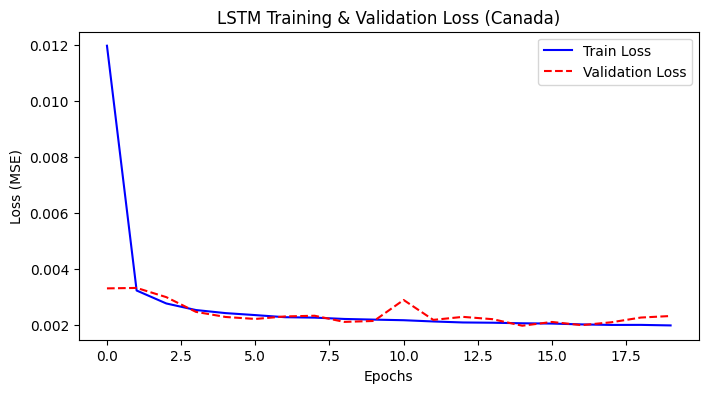

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
🔹 MSE on Test Data (Canada): 15154.3226
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


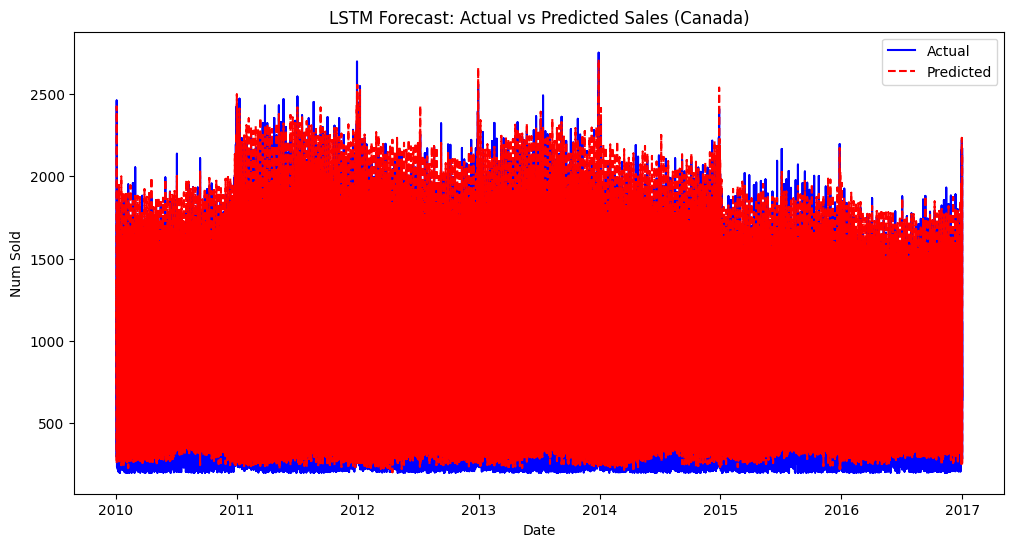

In [29]:
df_can_predicted = train_lstm_forecast(df_can,'Canada')